In [13]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util import *
from agents import *
from config import Config
import numpy as np

In [2]:
test_mm = AdaptiveMarketMaker_Batch(config = Config(), B = 100)

In [3]:
test_mm.determine_price(torch.ones(100))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [17]:
data = torch.load('test.pt')

/var/folders/ld/776wkv1x7j163s0ynxr2xqq00000gn/T/ipykernel_10808/14747726.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('test.pt')


In [15]:
data.keys()

dict_keys(['v', 'p', 'z', 'y', 'u', 'profit', 'last_state', 'convergence_counter', 'config', 'agents'])

In [16]:
data = np.load('/Users/moyuanchen/Documents/thesis/sim_3/data_part_0.npy', allow_pickle=True)

In [124]:
data = data.item()

In [5]:
z = data['z']
x = data['x']
x_avg = np.mean(x, axis = 0)
u = data['u']
y = z + x_avg + u

KeyError: 'x'

In [126]:
x_avg.shape

(500000,)

In [127]:
y.shape

(500000,)

(array([ 2.,  0.,  0.,  0.,  2.,  0.,  3.,  2.,  1.,  2.,  2.,  2.,  1.,
         2.,  0.,  1.,  3.,  1.,  5.,  4.,  4.,  4.,  5.,  5.,  8.,  2.,
         6.,  8.,  6.,  2.,  9.,  7., 10.,  3., 10.,  9., 12., 11., 10.,
        10.,  6., 13.,  8., 15.,  7.,  6.,  5.,  5.,  9., 10.,  9.,  7.,
         8.,  9., 11.,  9., 14., 12.,  6., 10.,  6.,  9., 13., 11.,  8.,
        10., 11.,  6.,  3.,  6.,  5.,  6.,  5.,  3.,  7.,  5.,  3.,  3.,
         1.,  4.,  2.,  5.,  2.,  3.,  2.,  1.,  1.,  0.,  0.,  2.,  1.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-456.5934736 , -447.11729006, -437.64110652, -428.16492298,
        -418.68873945, -409.21255591, -399.73637237, -390.26018883,
        -380.78400529, -371.30782175, -361.83163821, -352.35545467,
        -342.87927113, -333.4030876 , -323.92690406, -314.45072052,
        -304.97453698, -295.49835344, -286.0221699 , -276.54598636,
        -267.06980282, -257.59361928, -248.11743574, -238.64125221,
        -229.16506867, -21

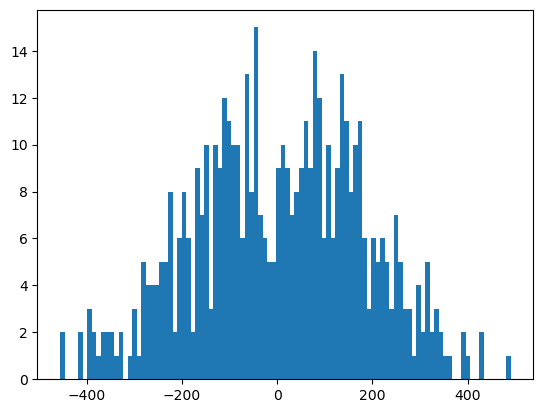

In [128]:
plt.hist(y[::1000], bins=100)

In [11]:
profit.shape

torch.Size([100, 2, 5000])

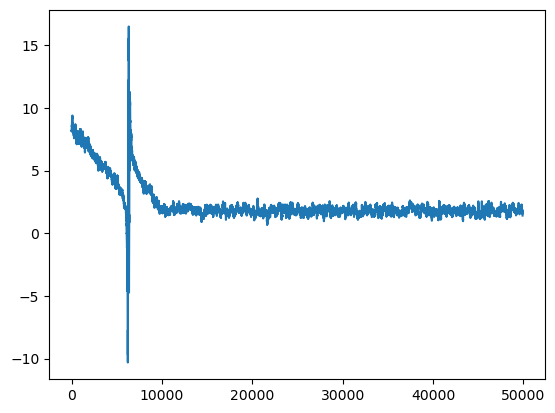

In [24]:
profit = data['profit']
profit = torch.mean(profit, dim=(0,1))
window_size = 100
moving_avg = np.convolve(profit, np.ones(window_size)/window_size, mode='valid')
plt.plot(moving_avg)

In [19]:
t = torch.zeros(2,100)
a,b = t
print(a.shape, b.shape)

torch.Size([100]) torch.Size([100])


In [20]:
data['agents']

{'informed': <agents.InformedAgents_Batch at 0x1689d4ad0>,
 'preferred_habitat': <agents.PreferredHabitatAgent at 0x168b1eb10>,
 'market_maker': <agents.AdaptiveMarketMaker_Batch at 0x152305e50>}

In [21]:
test_mm = 

SyntaxError: invalid syntax (2424400083.py, line 1)

In [22]:
market_maker = data['agents']['market_maker']
market_maker

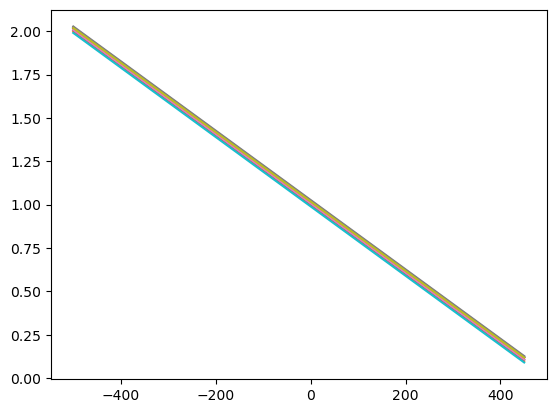

In [23]:
p = []
for y in range(-500,500,50):
    price = market_maker.determine_price(y)
    p.append(price)

plt.plot(range(-500,500,50),p)

In [108]:
dir(market_maker)

['OLS',
 'Tm',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'determine_price',
 'historical_data',
 'theta',
 'update',
 'vars_']

In [61]:
c = Config(sigma_u=1,Np=61, Nv = 20,Nx = 30)
result = simulate_batch(config=c, save_path='test.csv', T = 25000, B=3)


tensor(0.4635) tensor(0.8109)
tensor([[ True,  True],
        [False, False],
        [False, False]])
tensor([[ 0,  0],
        [ 5, 22],
        [20, 19]])
tensor([-341.6666,  -23.5632,  117.8161])
tensor([-340.5806,  -22.5769,  119.3159])
tensor(0.1953) tensor(1.3186)
tensor([[False,  True],
        [False, False],
        [False, False]])
tensor([[ 7,  0],
        [28, 26],
        [13, 25]])
tensor([-259.1953,  294.5402,  106.0345])
tensor([-255.8003,  294.7978,  105.0591])
tensor(0.1953) tensor(1.1891)
tensor([[ True, False],
        [False, False],
        [ True, False]])
tensor([[ 0,  1],
        [12,  3],
        [29, 14]])
tensor([-329.8850, -164.9425,  164.9425])
tensor([-327.2638, -163.9373,  164.6782])
tensor(0.1953) tensor(0.8109)
tensor([[False, False],
        [False, False],
        [False, False]])
tensor([[13,  5],
        [19, 16],
        [22, 13]])
tensor([-129.5977,   70.6896,   70.6896])
tensor([-128.2614,   72.7738,   71.3120])
tensor(0.1953) tensor(0.9373)
te

In [80]:
c

Config(I=2, batch=100, steps=1000000, Np=61, Nv=20, Nx=30, iota=0.1, v_bar=1.0, sigma_v=1.0, sigma_u=1, rho=0.95, alpha=0.01, beta=1e-05, xi=500.0, Tm=10000, theta=0.1, device='cpu', num_workers=1, chi_N=166.66663333334233, chi_M=124.999950000016, lambda_N=0.002000000399999972, lambda_M=0.002000000800000064)

In [62]:
profit = result[0]['profit']
profit.shape

torch.Size([3, 2, 25000])

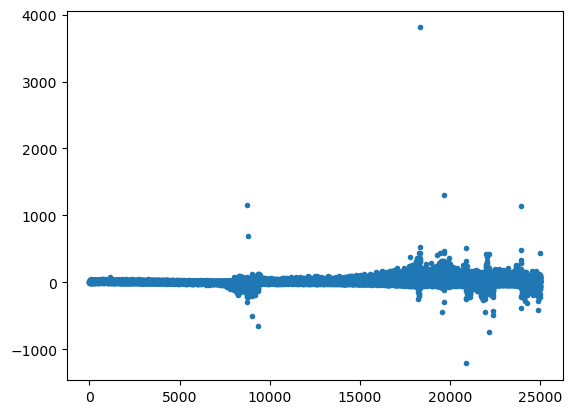

In [63]:
plt.plot(torch.mean(profit, dim = (0,1)), '.')

In [64]:
informed = result[0]['agents']['informed']

In [65]:
informed.p_discrete

tensor([0.1953, 0.2221, 0.2489, 0.2758, 0.3026, 0.3294, 0.3562, 0.3831, 0.4099,
        0.4367, 0.4635, 0.4904, 0.5172, 0.5440, 0.5708, 0.5976, 0.6245, 0.6513,
        0.6781, 0.7049, 0.7318, 0.7586, 0.7854, 0.8122, 0.8391, 0.8659, 0.8927,
        0.9195, 0.9464, 0.9732, 1.0000, 1.0268, 1.0536, 1.0805, 1.1073, 1.1341,
        1.1609, 1.1878, 1.2146, 1.2414, 1.2682, 1.2951, 1.3219, 1.3487, 1.3755,
        1.4024, 1.4292, 1.4560, 1.4828, 1.5096, 1.5365, 1.5633, 1.5901, 1.6169,
        1.6438, 1.6706, 1.6974, 1.7242, 1.7511, 1.7779, 1.8047])

In [66]:
state_count = result[0]['agents']['informed'].state_count

In [68]:
print(torch.mean(state_count.to(torch.float32), dim=(0,1,-1)))

tensor([458.7000,  21.1500,  19.6333,  18.3167,  16.6833,  16.7667,  14.7000,
         14.1833,  14.2000,  13.2000,  11.7167,  10.2667,  12.0333,  11.4333,
          8.8000,   9.4667,   8.1333,   8.9000,   7.6667,   7.7833,   6.7667,
          5.5500,   5.3167,   5.5667,   4.6167,   5.4667,   4.6833,   5.8500,
          5.1500,   7.4667,  10.7833,   7.1500,   4.0500,   3.9500,   3.7833,
          3.3833,   4.5667,   3.6333,   4.5167,   3.8833,   3.8333,   3.9167,
          5.2500,   4.1000,   4.2000,   4.1667,   4.3667,   3.8000,   3.7500,
          3.7333,   3.3333,   3.5500,   3.0333,   3.5000,   3.2833,   3.4500,
          3.6500,   3.7667,   3.1000,   2.8000, 365.5500])


In [69]:
convergence = result[0]['convergence_counter']

In [70]:
torch.mean(convergence.to(torch.float32), dim = (0,1))

tensor(1.3333)

In [71]:
market_maker = result[0]['agents']['market_maker']

In [72]:
historical = market_maker.historical_data

In [73]:
historical

{'v': <agents.CircularBuffer_Batch at 0x3136c17f0>,
 'p': <agents.CircularBuffer_Batch at 0x31386f0b0>,
 'z': <agents.CircularBuffer_Batch at 0x324618110>,
 'y': <agents.CircularBuffer_Batch at 0x313717fb0>}

In [74]:
result[0]['y'][0].shape

torch.Size([25000])

In [75]:
y0_res = result[0]['y'][0,-10000:]
y0_res.shape

torch.Size([10000])

In [76]:
y = result[0]['y']
min(y.view(-1))
print(min(y.view(-1)), max(y.view(-1)))

tensor(-343.7500, dtype=torch.float16) tensor(346., dtype=torch.float16)


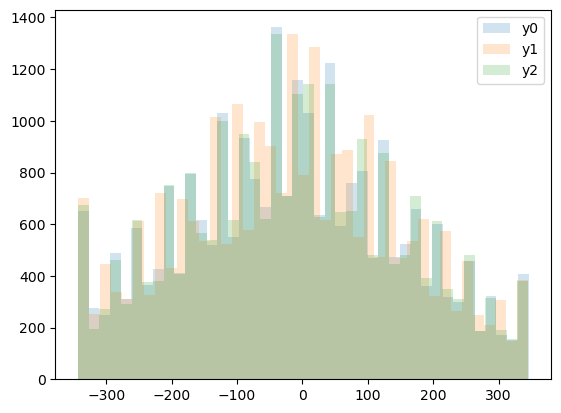

In [77]:
plt.hist(y[0].numpy(), bins='auto',alpha=0.2, label='y0')
plt.hist(y[1].numpy(), bins='auto', alpha=0.2, label='y1')
plt.hist(y[2].numpy(), bins='auto', alpha=0.2, label='y2')
plt.legend()

In [78]:
y = historical['y'].get()
y0 = y[0]
y0.shape

torch.Size([10000])

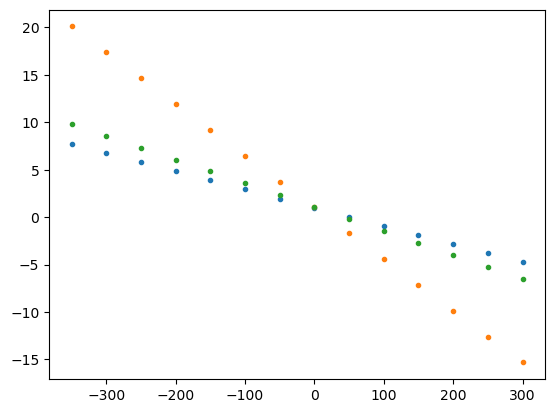

In [79]:
mm_price = []
for _y in range(-350, 350,50):
    price = market_maker.determine_price(_y)
    mm_price.append(price)

plt.plot(range(-350,350,50),mm_price,'.')

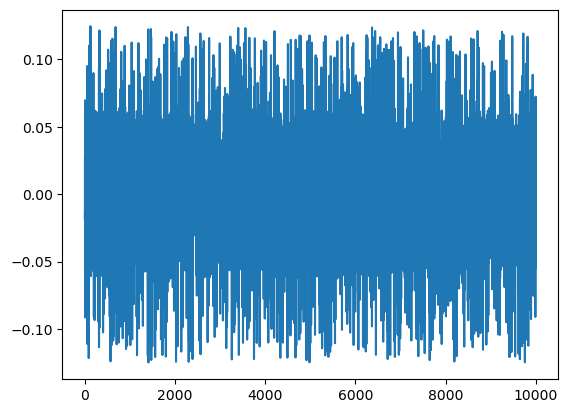

In [ ]:
# plt.plot(y0)
# plt.plot(y0_res-y0)

In [30]:
y.get()

tensor([[ 148.3895,  123.1436, -168.4017,  ...,   24.7033,  122.8166,
          221.4581],
        [ 146.4453, -120.9936,  -46.1669,  ..., -244.2651,  -72.4345,
          245.7922],
        [  27.3405,  124.5341,  -24.4455,  ...,  317.4385, -292.4911,
          -26.3620]])

y = historical['y']

In [30]:
vs = set(result[0]['v'])

In [31]:
plt.plot(sorted(list(vs)),'.')

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [20]:
result[0]

{'v': tensor([[0, 1, 0,  ..., 4, 5, 3],
         [3, 0, 1,  ..., 4, 5, 2],
         [1, 1, 1,  ..., 2, 8, 3],
         ...,
         [5, 6, 8,  ..., 2, 2, 9],
         [2, 2, 7,  ..., 5, 9, 6],
         [4, 9, 5,  ..., 8, 3, 0]]),
 'p': tensor([[0.5732, 0.1997, 0.1997,  ..., 0.4666, 0.1997, 0.1997],
         [1.1602, 0.1997, 0.1997,  ..., 0.5200, 0.6265, 0.1997],
         [1.5869, 0.1997, 0.1997,  ..., 0.8398, 0.4666, 0.4131],
         ...,
         [1.2139, 0.1997, 0.4666,  ..., 0.1997, 0.1997, 0.4666],
         [0.7866, 0.1997, 0.1997,  ..., 0.4666, 0.5200, 0.5732],
         [1.7998, 0.1997, 0.1997,  ..., 0.3064, 0.6265, 0.4131]],
        dtype=torch.float16),
 'z': tensor([[500.0000, 541.5000, 511.0000,  ..., 396.7500, 426.5000, 231.8750],
         [500.0000, 498.7500, 673.0000,  ..., 185.5000, 404.7500, 357.7500],
         [500.0000, 885.5000, 498.7500,  ..., 274.5000, 289.7500, 182.6250],
         ...,
         [500.0000, 262.0000, 415.0000,  ..., 391.2500, 266.7500,  64.5000],
  

In [11]:
data = torch.load('/Users/moyuanchen/sigma_u_0.05_part_2.pt')

/var/folders/ld/776wkv1x7j163s0ynxr2xqq00000gn/T/ipykernel_96309/2327876971.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('/Users/moyuanchen/sigma_u_

In [19]:
data

{'v': tensor([[3, 4, 8,  ..., 9, 9, 9],
         [6, 7, 5,  ..., 9, 9, 9],
         [4, 6, 5,  ..., 0, 0, 0],
         ...,
         [7, 5, 3,  ..., 9, 9, 9],
         [7, 9, 9,  ..., 0, 0, 0],
         [1, 1, 2,  ..., 0, 0, 0]]),
 'p': tensor([[0.1997, 0.1997, 1.7998,  ..., 1.7998, 1.7998, 1.7998],
         [1.2666, 0.6265, 0.1997,  ..., 1.6406, 1.0000, 1.0000],
         [0.1997, 0.1997, 0.1997,  ..., 0.1997, 0.1997, 0.1997],
         ...,
         [0.1997, 0.1997, 0.1997,  ..., 1.7998, 1.7998, 1.7998],
         [0.1997, 0.1997, 0.1997,  ..., 0.1997, 0.1997, 0.1997],
         [0.1997, 0.1997, 0.1997,  ..., 0.1997, 1.6934, 1.7998]],
        dtype=torch.float16),
 'z': tensor([[ 4.9475e+02, -2.3340e+03, -3.1640e+03,  ..., -9.0050e+02,
          -5.9500e+02, -1.0150e+03],
         [ 1.8450e+02,  4.9675e+02,  2.9234e+01,  ...,  5.1641e+00,
           3.7402e+00, -6.3500e+02],
         [ 2.6300e+03,  2.6340e+03,  1.7770e+03,  ...,  8.5300e+02,
           7.6850e+02,  8.2200e+02],
         

In [13]:
agents = data['agents']
informed = agents['informed']

In [14]:
state_count = informed.state_count

In [17]:
ex_sc = state_count[0,0,...]

In [18]:
ex_sc

tensor([[10067,    86,    77,    50,    49,    63,    59,    79,   127, 17009],
        [  510,     2,     0,     4,     1,     2,     2,     2,     5,   754],
        [  470,     1,     1,     0,     1,     2,     2,     3,     3,   769],
        [  494,     1,     1,     6,     1,     1,     2,     1,     3,   729],
        [  438,     4,     1,     2,     1,     1,     1,     4,     3,   684],
        [  530,     3,     0,     1,     1,     2,     0,     0,     1,   703],
        [  531,     2,     1,     3,     0,     1,     3,     3,     1,   721],
        [  521,     1,     1,     1,     0,     1,     3,     1,     1,   622],
        [  477,     5,     2,     1,     0,     0,     2,     4,     1,   598],
        [  524,     2,     2,     1,     0,     2,     0,     0,     4,   716],
        [  461,     4,     0,     0,     2,     1,     0,     1,     4,   759],
        [  572,     5,     4,     2,     0,     2,     5,     3,     1,   775],
        [  553,     1,     3,     3,    

In [16]:
state_count.shape

torch.Size([100, 2, 31, 10])

In [21]:
informed.convergence_counter

tensor([[  0,   0],
        [  0,   0],
        [  0,   0],
        [  1,   1],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  1,   1],
        [  3,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  2,   2],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [ 10,  10],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   9],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [165, 165],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  1,   0],
        [  3,   3],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  7,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  5,   0],
        [  0,   0],
        [  0,   0],


(array([[98.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [99.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <a list of 2 BarContainer objects>)

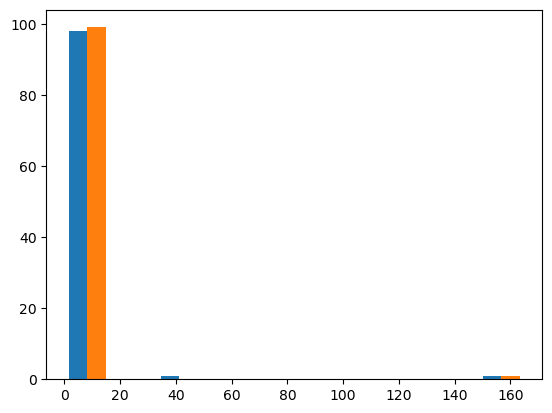

In [22]:
plt.hist(informed.convergence_counter)

(array([[95.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.],
        [97.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 BarContainer objects>)

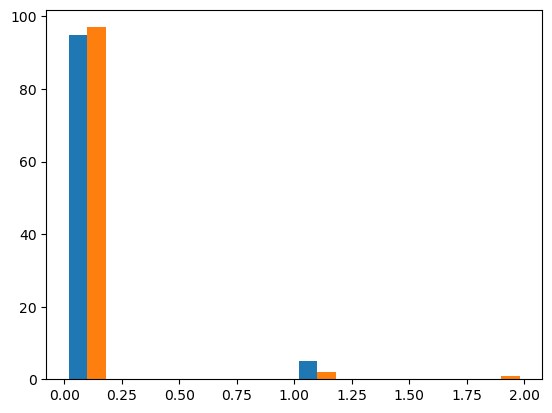

In [7]:
plt.hist(informed.convergence_counter)

In [11]:
data.keys()

dict_keys(['v', 'p', 'z', 'y', 'u', 'profit', 'last_state', 'convergence_counter', 'config', 'agents'])

In [131]:
data['profit'].shape

torch.Size([1000, 2, 5000])

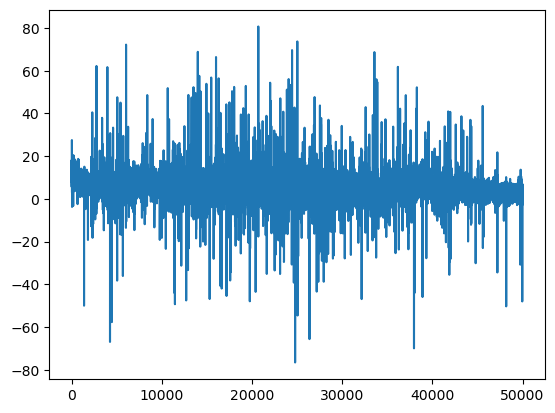

In [23]:
profit = data['profit'].mean(dim=(0, 1))
plt.plot(profit)

In [133]:
informed.state_count.shape

torch.Size([1000, 2, 31, 10])

In [24]:
sc= informed.state_count

In [25]:
sc_avg = sc.float().mean(dim=(0,1))


In [26]:
sc_avg.shape

torch.Size([31, 10])

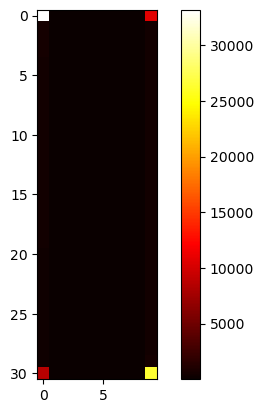

In [27]:
# visualize sc
plt.imshow(sc_avg, cmap='hot', interpolation='nearest')
plt.colorbar()

In [138]:
sc_avg

tensor([[2.5342e+02, 2.5365e+02, 2.5399e+02, 2.5346e+02, 2.5404e+02, 2.5353e+02,
         2.5340e+02, 2.5302e+02, 2.5346e+02, 2.5297e+02],
        [5.3749e+01, 5.4068e+01, 5.3550e+01, 5.3907e+01, 5.3529e+01, 5.3760e+01,
         5.3816e+01, 5.3947e+01, 5.3734e+01, 5.3681e+01],
        [4.6630e+01, 4.6789e+01, 4.6664e+01, 4.7038e+01, 4.6948e+01, 4.6776e+01,
         4.6884e+01, 4.7055e+01, 4.6912e+01, 4.6684e+01],
        [3.9038e+01, 3.8922e+01, 3.8879e+01, 3.8868e+01, 3.9154e+01, 3.8754e+01,
         3.9231e+01, 3.8924e+01, 3.8952e+01, 3.8881e+01],
        [3.1036e+01, 3.1115e+01, 3.0869e+01, 3.0959e+01, 3.1198e+01, 3.1202e+01,
         3.1145e+01, 3.1260e+01, 3.1255e+01, 3.1177e+01],
        [2.3748e+01, 2.3411e+01, 2.3505e+01, 2.4019e+01, 2.3812e+01, 2.3791e+01,
         2.3663e+01, 2.3906e+01, 2.3532e+01, 2.3907e+01],
        [1.7049e+01, 1.7447e+01, 1.7312e+01, 1.7217e+01, 1.7234e+01, 1.7263e+01,
         1.7115e+01, 1.6813e+01, 1.7219e+01, 1.7259e+01],
        [1.2211e+01, 1.2173

In [139]:
sc[0,0]

tensor([[263, 270, 287, 237, 263, 262, 249, 260, 247, 244],
        [ 53,  61,  51,  46,  60,  42,  56,  60,  45,  59],
        [ 44,  46,  57,  54,  44,  63,  48,  37,  50,  42],
        [ 47,  42,  41,  37,  32,  37,  43,  53,  30,  47],
        [ 33,  26,  34,  26,  17,  32,  40,  36,  26,  34],
        [ 23,  20,  21,  24,  25,  23,  23,  25,  30,  12],
        [ 16,  17,  17,  12,  11,  20,  22,  14,  16,  10],
        [ 18,  12,  13,  12,   9,  11,  18,  12,  11,   7],
        [  8,   8,   6,   2,   6,   5,   7,  12,   7,   6],
        [  6,   5,   4,   2,   3,   4,   6,   5,   2,   9],
        [  4,   1,   1,   3,   3,   4,   7,   1,   1,   5],
        [  3,   2,   1,   5,   1,   1,   4,   3,   1,   4],
        [  0,   1,   0,   1,   0,   4,   2,   1,   1,   0],
        [  0,   0,   0,   0,   1,   0,   1,   2,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,  

KeyboardInterrupt: 

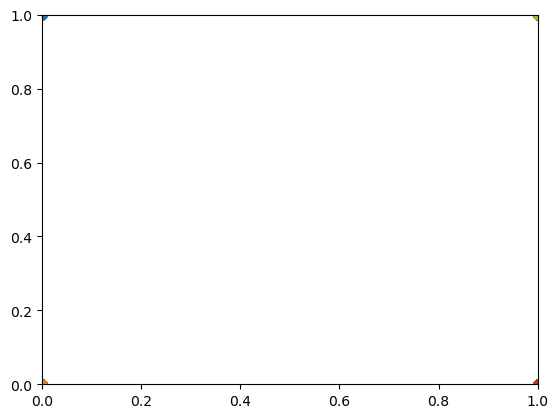

In [30]:
plt.plot(data['v'], 'o')

In [62]:
vpath = torch.randint(0, Nv, (B, T))

In [63]:
vpath.shape

torch.Size([1000, 50000])

In [65]:
data['v'].shape

torch.Size([1000, 50000])

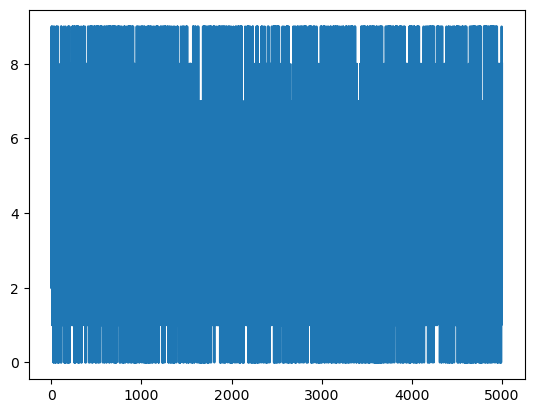

In [140]:
plt.plot(data['v'][0])

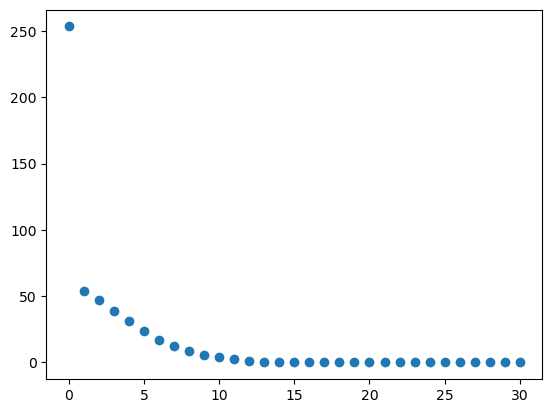

In [141]:
plt.plot(informed.state_count.float().mean(dim = (0,1,3)), 'o')

In [142]:
data['last_state']

tensor([[11,  8],
        [12,  8],
        [ 6,  1],
        ...,
        [14,  7],
        [ 5,  6],
        [ 3,  9]])

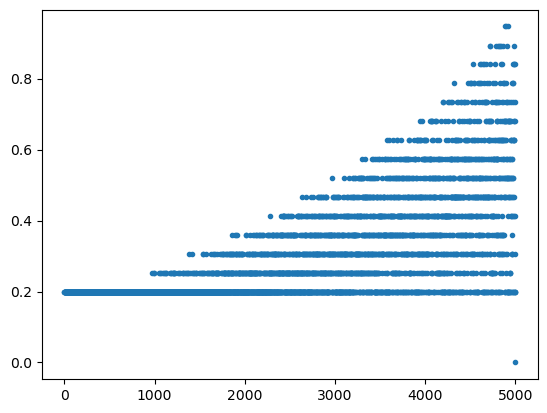

In [143]:
plt.plot(data['p'][3],'.')

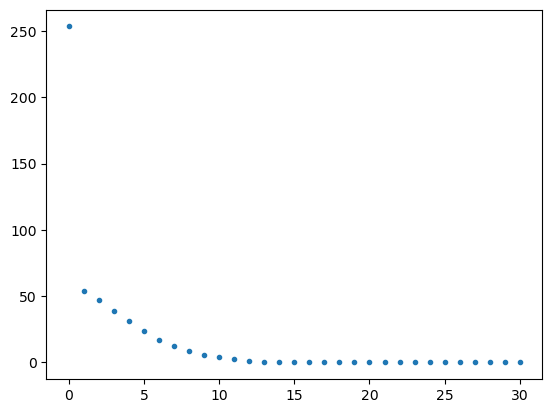

In [144]:
plt.plot(informed.state_count.float().mean(dim=(0,1,3)),'.')

In [145]:
informed.state_count.float().mean(dim=(0,1,3))

tensor([2.5349e+02, 5.3774e+01, 4.6838e+01, 3.8960e+01, 3.1122e+01, 2.3729e+01,
        1.7193e+01, 1.2205e+01, 8.4879e+00, 5.7997e+00, 3.7861e+00, 2.3378e+00,
        1.3339e+00, 6.2990e-01, 1.5420e-01, 6.4000e-03, 4.1000e-03, 2.4000e-03,
        4.1000e-03, 4.0000e-03, 2.9000e-03, 3.3000e-03, 3.3000e-03, 3.2000e-03,
        2.1000e-03, 2.4000e-03, 3.6000e-03, 4.5000e-03, 2.2000e-03, 3.4000e-03,
        3.7000e-03])

In [146]:
informed.p_discrete

tensor([0.1995, 0.2529, 0.3063, 0.3596, 0.4130, 0.4664, 0.5197, 0.5731, 0.6264,
        0.6798, 0.7332, 0.7865, 0.8399, 0.8933, 0.9466, 1.0000, 1.0534, 1.1067,
        1.1601, 1.2135, 1.2668, 1.3202, 1.3736, 1.4269, 1.4803, 1.5336, 1.5870,
        1.6404, 1.6937, 1.7471, 1.8005])

In [147]:
last_state = data['last_state']

In [148]:
last_state

tensor([[11,  8],
        [12,  8],
        [ 6,  1],
        ...,
        [14,  7],
        [ 5,  6],
        [ 3,  9]])